In [35]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Importing all datasets
MatchWinning_data = pd.read_csv("MatchWinningDataset.csv")

In [38]:
MatchWinning_data.head()

Scorecard       Team 1     Team 2       Winner     Margin        Ground  \
0   ODI # 1    Australia    England    Australia  5 wickets     Melbourne   
1   ODI # 2      England  Australia      England  6 wickets    Manchester   
2   ODI # 3      England  Australia    Australia  5 wickets        Lord's   
3   ODI # 4      England  Australia      England  2 wickets    Birmingham   
4   ODI # 5  New Zealand   Pakistan  New Zealand    22 runs  Christchurch   

     Match Date  
0   Jan 5, 1971  
1  Aug 24, 1972  
2  Aug 26, 1972  
3  Aug 28, 1972  
4  Feb 11, 1973

In [39]:
MatchWinning_data_new = MatchWinning_data[((MatchWinning_data['Team 1'] == 'Australia' ) & (MatchWinning_data['Team 2'] == 'India' )) | 
                                            ((MatchWinning_data['Team 1'] == 'India' ) & (MatchWinning_data['Team 2'] == 'Australia' ))]
MatchWinning_data_new.head()

Scorecard     Team 1 Team 2     Winner     Margin     Ground  \
96    ODI # 97  Australia  India      India    66 runs  Melbourne   
99   ODI # 100  Australia  India  Australia  9 wickets     Sydney   
103  ODI # 104  Australia  India  Australia  9 wickets     Sydney   
105  ODI # 106  Australia  India  Australia  7 wickets  Melbourne   
107  ODI # 108  Australia  India  Australia    27 runs     Sydney   

       Match Date  
96    Dec 6, 1980  
99   Dec 18, 1980  
103   Jan 8, 1981  
105  Jan 11, 1981  
107  Jan 15, 1981

In [40]:
MatchWinning_data_new['Scorecard'] = MatchWinning_data_new['Scorecard'].map(lambda x: x.replace('ODI # ', ''))

In [41]:
MatchWinning_data_new.head()

Scorecard     Team 1 Team 2     Winner     Margin     Ground    Match Date
96         97  Australia  India      India    66 runs  Melbourne   Dec 6, 1980
99        100  Australia  India  Australia  9 wickets     Sydney  Dec 18, 1980
103       104  Australia  India  Australia  9 wickets     Sydney   Jan 8, 1981
105       106  Australia  India  Australia  7 wickets  Melbourne  Jan 11, 1981
107       108  Australia  India  Australia    27 runs     Sydney  Jan 15, 1981

In [42]:
#MatchWinning_data_AUS = MatchWinning_data_new[(MatchWinning_data_new['Team 1'] == 'Australia' )]
#MatchWinning_data_AUS.head()

In [43]:
#MatchWinning_data_IND = MatchWinning_data_new[(MatchWinning_data_new['Team 1'] == 'India' )]
#MatchWinning_data_IND.head()

In [44]:
MatchWinning_data_Final = MatchWinning_data_new.drop(['Team 2','Margin','Match Date'], 1)
MatchWinning_data_Final.head()

Scorecard     Team 1     Winner     Ground
96         97  Australia      India  Melbourne
99        100  Australia  Australia     Sydney
103       104  Australia  Australia     Sydney
105       106  Australia  Australia  Melbourne
107       108  Australia  Australia     Sydney

In [45]:
MatchWinning_data_Final.describe()

Scorecard     Team 1     Winner  Ground
count        128        128        128     128
unique       128          2          3      49
top          108  Australia  Australia  Sydney
freq           1         72         73      16

In [46]:
MatchWinning_data_Final = MatchWinning_data_Final.dropna(axis=1, how='all')

In [47]:
MatchWinning_data_Final.shape

(128, 4)

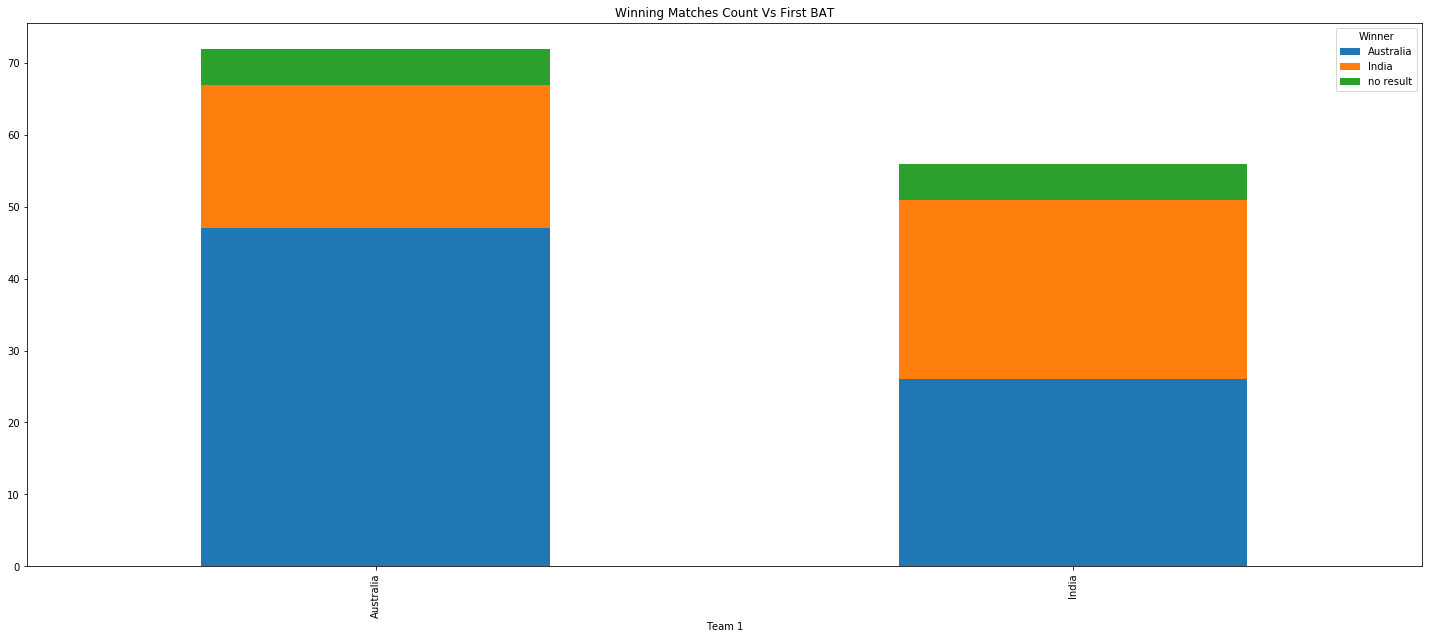

In [48]:
#Multivariate Analysis of different category 
MatchWinning_data_Final.groupby(['Team 1','Winner']).size().unstack().plot(
    kind='bar',stacked=True,figsize=(25,10), 
    title='Winning Matches Count Vs First BAT')
plt.show()

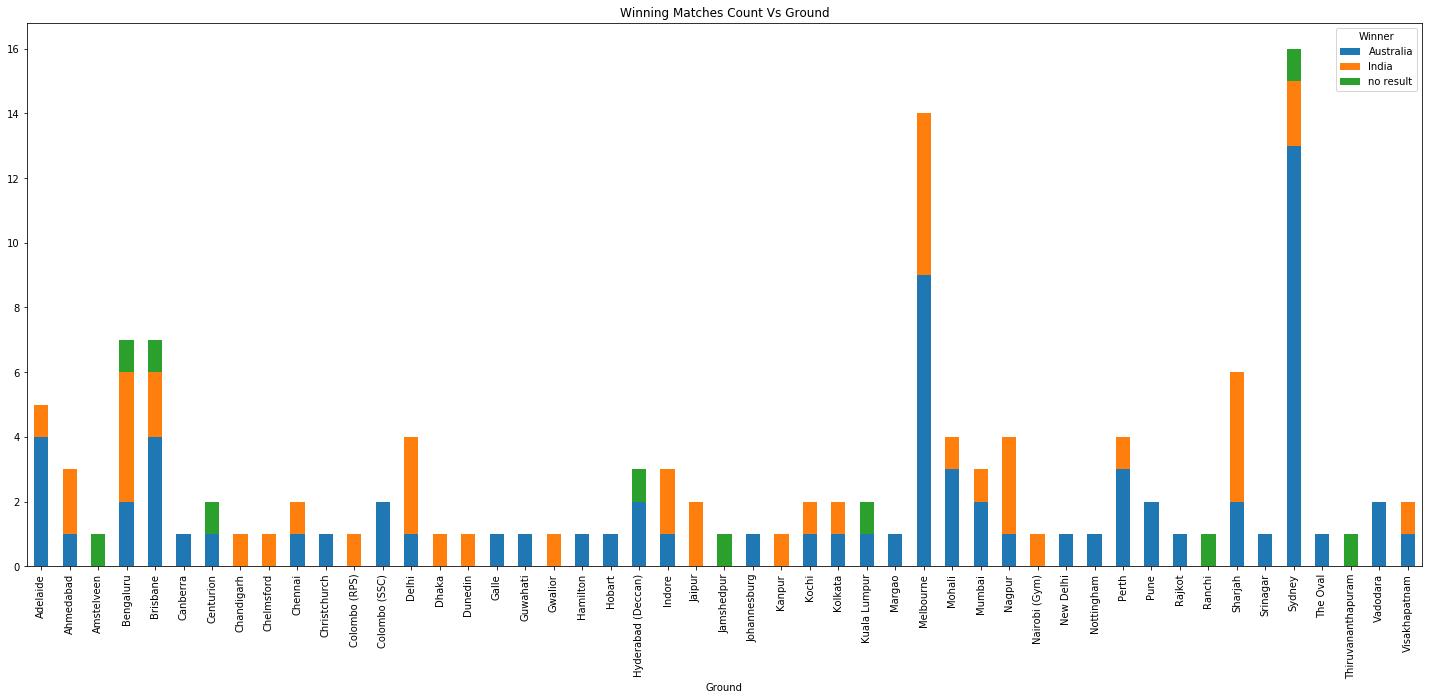

In [49]:
#Multivariate Analysis of different category 
MatchWinning_data_Final.groupby(['Ground','Winner']).size().unstack().plot(
    kind='bar',
    title='Winning Matches Count Vs Ground',
    stacked=True,figsize=(25,10))
plt.show()

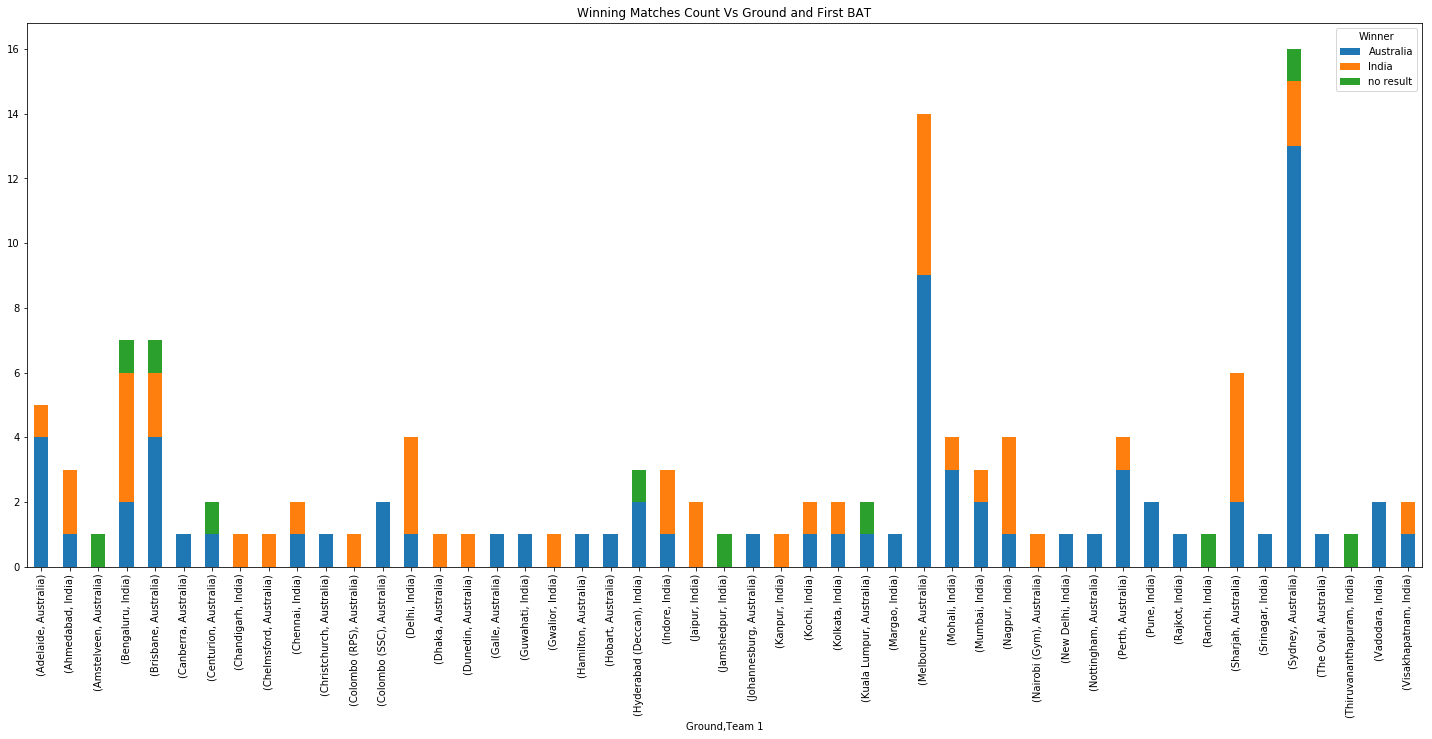

In [50]:
#Multivariate Analysis of different category 
MatchWinning_data_Final.groupby(['Ground','Team 1','Winner']).size().unstack().plot(
    kind='bar',
    title='Winning Matches Count Vs Ground and First BAT',
    stacked=True,figsize=(25,10))
plt.show()

# Making Prediction for Player who will score the maximum runs in the ODI series

In [52]:
cricket_player_data = pd.read_csv("innings_fixed.csv")
cricket_player_data.head()

Unnamed: 0                 Player   Runs Mins     BF X4s X6s     SR Inns  \
0           1           BC Lara (WI)  400.0  778  582.0  43   4  68.72    1   
1           2        ML Hayden (AUS)  380.0  622  437.0  38  11  86.95    1   
2           3           BC Lara (WI)  375.0  766  538.0  45   0  69.70    1   
3           4  DPMD Jayawardene (SL)  374.0  752  572.0  43   1  65.38    2   
4           5         GS Sobers (WI)  365.0  614    NaN  38   0    NaN    2   

   X.1  ...  X.2 Country Notout        Date  Year Day Month  Yday  Fours  Sixs  
0  NaN  ...  NaN      WI   True  2004-04-10  2004  10     4   101   43.0   4.0  
1  NaN  ...  NaN     AUS    NaN  2003-10-09  2003   9    10   282   38.0  11.0  
2  NaN  ...  NaN      WI    NaN  1994-04-16  1994  16     4   106   45.0   0.0  
3  NaN  ...  NaN      SL    NaN  2006-07-27  2006  27     7   208   43.0   1.0  
4  NaN  ...  NaN      WI   True  1958-02-26  1958  26     2    57   38.0   0.0  

[5 rows x 23 columns]

In [54]:
cricket_player_data.columns

Index(['Unnamed: 0', 'Player', 'Runs', 'Mins', 'BF', 'X4s', 'X6s', 'SR',
       'Inns', 'X.1', 'Opposition', 'Ground', 'Start.Date', 'X.2', 'Country',
       'Notout', 'Date', 'Year', 'Day', 'Month', 'Yday', 'Fours', 'Sixs'],
      dtype='object')

In [55]:
cricket_player_data = cricket_player_data.drop(['Unnamed: 0'],1)

In [56]:
cricket_player_data.head()

Player   Runs Mins     BF X4s X6s     SR Inns  X.1  \
0           BC Lara (WI)  400.0  778  582.0  43   4  68.72    1  NaN   
1        ML Hayden (AUS)  380.0  622  437.0  38  11  86.95    1  NaN   
2           BC Lara (WI)  375.0  766  538.0  45   0  69.70    1  NaN   
3  DPMD Jayawardene (SL)  374.0  752  572.0  43   1  65.38    2  NaN   
4         GS Sobers (WI)  365.0  614    NaN  38   0    NaN    2  NaN   

       Opposition  ...  X.2 Country  Notout        Date  Year Day  Month  \
0       v England  ...  NaN      WI    True  2004-04-10  2004  10      4   
1      v Zimbabwe  ...  NaN     AUS     NaN  2003-10-09  2003   9     10   
2       v England  ...  NaN      WI     NaN  1994-04-16  1994  16      4   
3  v South Africa  ...  NaN      SL     NaN  2006-07-27  2006  27      7   
4      v Pakistan  ...  NaN      WI    True  1958-02-26  1958  26      2   

   Yday  Fours  Sixs  
0   101   43.0   4.0  
1   282   38.0  11.0  
2   106   45.0   0.0  
3   208   43.0   1.0  
4    57   38.0   0.0  

[5 rows x 22 columns]

###  Below are the Teams which are going to play 

 #### INDIA 
 Virat Kohli (Capt), 
 Rohit Sharma (vc),
 Shikhar Dhawan,
 Ambati Rayudu,
 Kedar Jadhav,
 MS Dhoni (wk),
 Jasprit Bumrah,
 Bhuvneshwar Kumar,
 Yuzvendra Chahal,
 Kuldeep Yadav,
 Mohammed Shami,
 Vijay Shankar,
 KL Rahul,
 Rishabh Pant,
 Siddharth Kaul (1st and 2nd ODI),
 Ravindra Jadeja.
 
#### AUSTRALIA 
 Aaron Finch (c),
 Pat Cummins,
 Alex Carey,
 Jason Behrendorff,
 Nathan Coulter-Nile,
 Peter Handscomb,
 Usman Khawaja,
 Nathan Lyon,
 Shaun Marsh,
 Glenn Maxwell,
 Jhye Richardson,
 Kane Richardson,
 Marcus Stoinis,
 Ashton Turner,
 Adam Zampa,
 D’Arcy Short (cover for Marsh).
 
 #### We Need to Analyze the batting performance for above players
 

In [ ]:
players = ['INDIA', 'AUS']
cricket_player_data = cricket_data[cricket_player_data.Country.isin(teams)]
cricket_data_new.head()

In [62]:
cricket_player_data['Player'] = cricket_player_data['Player'].map(lambda x: x.replace(' (INDIA)', ''))    
cricket_player_data['Player'] = cricket_player_data['Player'].map(lambda x: x.replace(' (AUS)', ''))    

In [64]:
# Creating data set for Individual Player
virat_kohli = cricket_player_data[(cricket_player_data['Player'] == 'V Kohli')]

In [65]:
virat_kohli.head()

Player   Runs Mins     BF X4s X6s     SR Inns  X.1     Opposition  ...   \
122  V Kohli  235.0  515  340.0  25   1  69.11    2  NaN      v England  ...    
235  V Kohli  211.0  536  366.0  20   0  57.65    1  NaN  v New Zealand  ...    
295  V Kohli  204.0  295  246.0  24   0  82.92    1  NaN   v Bangladesh  ...    
360  V Kohli  200.0  375  283.0  24   0  70.67    1  NaN  v West Indies  ...    
685  V Kohli  169.0  380  272.0  18   0  62.13    2  NaN    v Australia  ...    

    X.2 Country  Notout        Date  Year Day  Month  Yday  Fours  Sixs  
122 NaN   INDIA     NaN  2016-12-08  2016   8     12   343   25.0   1.0  
235 NaN   INDIA     NaN  2016-10-08  2016   8     10   282   20.0   0.0  
295 NaN   INDIA     NaN  2017-02-09  2017   9      2    40   24.0   0.0  
360 NaN   INDIA     NaN  2016-07-21  2016  21      7   203   24.0   0.0  
685 NaN   INDIA     NaN  2014-12-26  2014  26     12   360   18.0   0.0  

[5 rows x 22 columns]

In [63]:
cricket_player_data[(cricket_player_data['Player'] == 'ML Hayden')]

Player   Runs Mins     BF X4s X6s      SR Inns  X.1      Opposition  \
1      ML Hayden  380.0  622  437.0  38  11   86.95    1  NaN      v Zimbabwe   
309    ML Hayden  203.0  474  320.0  15   6   63.43    1  NaN         v India   
378    ML Hayden  197.0  395  268.0  25   2   73.50    1  NaN       v England   
569    ML Hayden  177.0  343  260.0  22   3   68.07    3  NaN   v West Indies   
1008   ML Hayden  153.0  418  265.0  13   2   57.73    2  NaN       v England   
1449   ML Hayden  138.0  290  211.0  17   0   65.40    2  NaN  v South Africa   
1451   ML Hayden  138.0  416  303.0  18   0   45.54    2  NaN       v England   
1508   ML Hayden  137.0  356  242.0  17   2   56.61    3  NaN  v South Africa   
1540   ML Hayden  136.0  251  195.0  20   2   69.74    1  NaN   v New Zealand   
1543   ML Hayden  136.0  260  173.0  17   1   78.61    2  NaN         v India   
1688   ML Hayden  132.0  273  169.0  10   1   78.10    3  NaN     v Sri Lanka   
1722   ML Hayden  131.0  261  207.0  12   4   63.28    3  NaN  v South Africa   
1756   ML Hayden  130.0  310  211.0  12   2   61.61    3  NaN     v Sri Lanka   
1982   ML Hayden  125.0  354  226.0  15   1   55.30    2  NaN   v West Indies   
2030   ML Hayden  124.0  268  183.0   9   0   67.75    1  NaN         v India   
2085   ML Hayden  123.0  304  196.0  12   0   62.75    3  NaN         v India   
2139   ML Hayden  122.0  290  189.0  18   2   64.55    1  NaN  v South Africa   
2310   ML Hayden  119.0  283  172.0  18   1   69.18    2  NaN         v India   
2314   ML Hayden  119.0  431  255.0   9   1   46.66    2  NaN      v Pakistan   
2387   ML Hayden  118.0  233  163.0  10   2   72.39    3  NaN   v West Indies   
2457   ML Hayden  117.0  275  184.0  14   2   63.58    1  NaN     v Sri Lanka   
2893   ML Hayden  111.0  277  180.0  12   0   61.66    1  NaN  v ICC World XI   
2958   ML Hayden  110.0  265  169.0  11   1   65.08    2  NaN   v West Indies   
3368   ML Hayden  105.0  240  198.0  14   1   53.03    1  NaN  v South Africa   
3593   ML Hayden  103.0  217  152.0  13   1   67.76    3  NaN       v England   
3602   ML Hayden  103.0  271  200.0  10   1   51.50    2  NaN         v India   
3711   ML Hayden  102.0  189  149.0  10   3   68.45    1  NaN       v England   
3715   ML Hayden  102.0  309  217.0  12   0   47.00    3  NaN  v South Africa   
3759   ML Hayden  101.0  140   85.0  11   3  118.82    4  NaN      v Zimbabwe   
3893   ML Hayden  100.0  270  180.0  10   0   55.55    3  NaN   v West Indies   
...          ...    ...  ...    ...  ..  ..     ...  ...  ...             ...   
56566  ML Hayden    5.0   27   19.0   0   0   26.31    1  NaN   v West Indies   
56753  ML Hayden    5.0    8    9.0   0   0   55.55    4  NaN   v West Indies   
56886  ML Hayden    5.0   16    9.0   1   0   55.55    3  NaN     v Sri Lanka   
59908  ML Hayden    4.0    4    4.0   1   0  100.00    1  NaN      v Pakistan   
60034  ML Hayden    4.0   12    5.0   1   0   80.00    1  NaN      v Pakistan   
60098  ML Hayden    4.0   15   11.0   0   0   36.36    2  NaN  v South Africa   
60258  ML Hayden    4.0   38   22.0   1   0   18.18    3  NaN  v South Africa   
60958  ML Hayden    3.0   14   10.0   0   0   30.00    4  NaN  v South Africa   
62494  ML Hayden    3.0   13    7.0   0   0   42.85    2  NaN   v West Indies   
62712  ML Hayden    3.0   15    7.0   0   0   42.85    2  NaN  v South Africa   
63435  ML Hayden    2.0   11    6.0   0   0   33.33    4  NaN   v West Indies   
65334  ML Hayden    2.0   15   13.0   0   0   15.38    2  NaN   v New Zealand   
65494  ML Hayden    2.0   13    6.0   0   0   33.33    4  NaN       v England   
65550  ML Hayden    2.0   16    6.0   0   0   33.33    3  NaN     v Sri Lanka   
69245  ML Hayden    1.0   10    2.0   0   0   50.00    4  NaN       v England   
71244  ML Hayden    0.0    3    0.0   0   0     NaN    4  NaN       v England   
76542  ML Hayden    0.0    3    5.0   0   0    0.00    3  NaN   v West Indies   
76563  ML Hayden    0.0    2    3.0   0  